<b>Step 1: Loading the scikit-learn version of the diabetes dataset into using the load_diabetes function.</b>

Import diabetes dataset using sklearn.datasets in <b>diabetes</b>.

In [65]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

<b>Step 2: Spliting the dataset into the training and test sets.
<br>Random state = 309</b>

Split the dataset using train_test_split and assign X_train, X_test, y_train, y_test values.

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 309)

<b>Step 3: Training and test R<sup>2</sup> for the Lasso model.
         <t><br> Features of the model that are being used.
         <t><br> Names of the features. </b>

In [67]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
r_square_train = lasso.score(X_train, y_train)
r_square_test = lasso.score(X_test, y_test)

print(f"Training R\u00b2: {r_square_train}")
print(f"Test R\u00b2: {r_square_test}")

total_features = np.sum(lasso.coef_ != 0)
print(f"Total number of features: {total_features}")
print("The features are:")
for i in range(len(lasso.coef_)):
    if lasso.coef_[i] != 0:
        print(diabetes.feature_names[i])

Training R²: 0.35511991243176455
Test R²: 0.35802127221643487
Total number of features: 3
The features are:
bmi
bp
s5


<b>Step 4: Loading the original diabetes dataset from the web page. </b>

In [68]:
d_X = np.genfromtxt("< dummy path >", usecols=np.arange(10), skip_header=1)
d_y = np.genfromtxt("< dummy path >", usecols=10, skip_header=1)

<b>Step 5: Splitting the dataset into training and test set</b>

In [69]:
X_train, X_test, y_train, y_test = train_test_split(d_X, d_y, random_state=309)

<b>Step 6: Training and test R<sup>2</sup> for the Lasso model.
         <t><br> Features of the model that are being used.
         <t><br> Names of the features. </b>

In [70]:
lasso = Lasso().fit(X_train, y_train)
r_square_train = lasso.score(X_train, y_train)
r_square_test = lasso.score(X_test, y_test)

print(f"Training R\u00b2: {r_square_train}")
print(f"Test R\u00b2: {r_square_test}")

total_features = np.sum(lasso.coef_ != 0)
print(f"Total number of features: {total_features}")
print("The features are:")
for i in range(len(lasso.coef_)):
    if lasso.coef_[i] != 0:
        print(diabetes.feature_names[i])

Training R²: 0.5052460786655852
Test R²: 0.5166778517260695
Total number of features: 9
The features are:
age
sex
bmi
bp
s2
s3
s4
s5
s6


<b>Step 7: Using StandardScaler to preprocess the training and test sets in the same way and avoiding data snooping.</b>

In [71]:
from sklearn.preprocessing import StandardScaler
standard_sca = StandardScaler()

standard_sca.fit(X_train)
standard_sca.fit(X_test)

X_train_sca = standard_sca.transform(X_train)
X_test_sca = standard_sca.transform(X_test)

<b>Step 8: Training and test R<sup>2</sup> for the Lasso model.
         <t><br> Features of the model that are being used.
         <t><br> Names of the features. </b>

In [72]:
lasso = Lasso().fit(X_train_sca, y_train)
r_square_train_sca = lasso.score(X_train_sca, y_train)
r_square_test_sca = lasso.score(X_test_sca, y_test)

print(f"Training R\u00b2: {r_square_train_sca}")
print(f"Test R\u00b2: {r_square_test_sca}")

total_features = np.sum(lasso.coef_ != 0)
print(f"Total number of features: {total_features}")
print("The features are:")
for i in range(len(lasso.coef_)):
    if lasso.coef_[i] != 0:
        print(diabetes.feature_names[i])

Training R²: 0.5074980483618166
Test R²: 0.521782851406597
Total number of features: 9
The features are:
age
sex
bmi
bp
s1
s3
s4
s5
s6


The results are closer to those in item 6. 
Observations: The training and test set for item 3 is less than that in item 6 where original data was used, which is closer to the above results.
    It has same number of features and similar R squares. Here, because of snooping, more errors have occurred.

<b>Step 9: R square v/s Number of features plot.  </b>

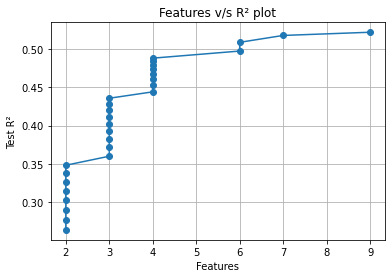

In [73]:
import matplotlib.pyplot as plt
alpha = list(np.arange(1,30,1))
x = []
y = []
count = 0

for i in alpha:
    lasso = Lasso(alpha=i,max_iter=100000).fit(X_train_sca, y_train)
    y.append(lasso.score(X_test_sca, y_test))
    x.append(sum(lasso.coef_ != 0))
    count=count+1

plt.plot(x,y, marker = 'o')
plt.xlabel('Features')
plt.ylabel('Test R\u00b2')
plt.title('Features v/s R\u00b2 plot')

plt.grid()
plt.show()

I prefer the point (6,0.51), that is, 6 features and 3 alpha. From this point, the graph has not showing much of an upward trend. The reason forselecting this value is because the greater the alpha's value, the increase will be less.

<b> Step 10: Using cross-validation, choosing the regularization parameter for Lasso. Training the Lasso on the training set using the chosen values of the parameters</b>

Create a function <b>max_find()</b> to find the maximum value of alpha.

In [74]:
import math
def max_find(x):
    m = - math.inf
    val = 0
    for i in range (len(x)):
        if x[i] > m:
            m = x[i]
            val = i
    return val

Using <b>cross_val_score</b> find the value for best alpha.

In [75]:
from sklearn.model_selection import cross_val_score
alpha = list(np.arange(0.1,3,0.001))
res = np.empty(len(alpha))

for i in range(len(alpha)):
    lasso = Lasso(alpha=alpha[i])
    res[i] = np.mean(cross_val_score(lasso, X_train_sca, y_train, cv=4))
best_alpha = alpha[max_find(res)]
print(f"Best alpha value: {round(best_alpha,5)}")   

Best alpha value: 0.214


Printing the training and test R square and number of features

In [76]:
lasso = Lasso(alpha=best_alpha).fit(X_train_sca, y_train)
r_square_train = lasso.score(X_train_sca, y_train)
r_square_test = lasso.score(X_test_sca, y_test)

print(f"Training R\u00b2: {r_square_train}")
print(f"Test R\u00b2: {r_square_test}")

total_features = np.sum(lasso.coef_ != 0)
print(f"Total number of features: {total_features}")
print("The features are:")
for i in range(len(lasso.coef_)):
    if lasso.coef_[i] != 0:
        print(diabetes.feature_names[i])

Training R²: 0.5105258446925505
Test R²: 0.5221817185182072
Total number of features: 10
The features are:
age
sex
bmi
bp
s1
s2
s3
s4
s5
s6


<b><u>Results</u></b><br><br>
<b>Step 3:</b>
- Training R square: 0.35511
- Test R square: 0.35802
- Features: 3

<b>Step 6:</b>
- Training R square: 0.50524
- Test R square: 0.51667
- Features: 9

<b>Step 8:</b>
- Training R square: 0.50749
- Test R square: 0.52178
- Features: 9

<b>Step 10:</b>
- Training R square: 0.51052
- Test R square: 0.52218
- Features: 10